<a href="https://colab.research.google.com/github/paula-belr/series-temporais-temperatura/blob/main/atividade_extensionista_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Tendências e Impacto das Mudanças Climáticas em Uberlândia-MG: Evidências a partir da Análise Exploratória de Séries Temporais de Temperatura.**


---



### Atividades a serem realizadas

1.  **Coleta de dados**: Os dados foram coletados no site do Instituto Nacional de Meteorologia (INMET). Em Uberlândia, existem três estações reponsáveis pela coleta de dados meteorológicos, porém utilizarei os dados de apenas uma para este trabalho, a estação automática. Nesta, os dados de precipitação total (mm), pressão atmosférica (mB), temperatura máxima, média e mínima diária (°C), umidade do ar (%) e velocidade do vento (m/s) são medidas de forma automática pelos instrumentos de medida.

2.  **Processamento de dados**: Nesta etapa, vamos preparar os dados para a  análise, para isso, precisamos verficar se nosso conjunto de dados possui dados faltantes, inconsistências e se os dados precisam de alguma transformação, como de tipagem ou criação de novas variáveis.

3. **Análise de Dados**: Aqui é onde vamos utilizar a linguagem Python e bibliotecas como Pandas, Numpy, Seaborn, Matplotlib e Prophet para extraírmos informações importantes e responder às nossas perguntas. Para melhor entendimento, dividi este processo em subtarefas, são elas:

  * **Análise Exploratória de Dados (AED)**: Pela qual investigamos nosso conjunto de dados, desde a visualização à utilização de métricas, para identificar padrões entre as variáveis;

  * **Previsão**: Onde utilizaremos a biblioteca Prophet para fazer previsão de temperatura para um ano;

  * **Visualização**: Onde criaremos uma representação visual para facilitar a compreensão.

### 1 - Importando as bibliotecas que serão utilizadas nas etapas de processamento e análise dos dados.


---



In [1]:
# !pip install prophet

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prophet import Prophet
import seaborn as sns

from matplotlib.colors import Normalize
from prophet.plot import plot_plotly, plot_components_plotly
from seaborn import heatmap
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 2 - Processamento dos Dados


---




O intervalo dos dados para esta estação é:

* Começo: 01/01/2005
* Final: 31/12/2024

##### 2.1 - Dados da estação automática antes do processamento.


---


Aqui temos um vislumbre de como são nossos dados, quais variáveis teremos disponíveis para explorar, quais as unidades de medida dos dados, além disso, temos dados faltantes, também chamados de 'missing values', casas decimais separadas por vírgula e uma coluna que não traz nenhum dado.

In [4]:
# Carregamento dos dados
df_auto = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/dados-atividade-extensionista/estacoes-auto-uberlandia-a507-01-01-2005-31-12-2024/dados_A507_D_2005-01-01_2024-12-31 (1).csv',
                      sep = ';',
                      skiprows = 10)

df_auto

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",Unnamed: 8
0,2005-01-01,"5,6",916,"29,6","23,3","18,9","73,1","1,4",NaN
1,2005-01-02,NaN,NaN,NaN,NaN,NaN,"69,3",NaN,NaN
2,2005-01-03,"13,8","916,6","26,8",NaN,"17,8","81,4","2,6",NaN
3,2005-01-04,NaN,"914,9","26,5",NaN,"19,1",82,"2,5",NaN
4,2005-01-05,NaN,NaN,"27,1",NaN,"19,6","78,4",NaN,NaN
...,...,...,...,...,...,...,...,...,...
7300,2024-12-27,"20,6","915,8","23,8","21,2","19,6","88,1","1,6",NaN
7301,2024-12-28,"8,6","916,1","27,9","22,6","20,5","81,7","1,4",NaN
7302,2024-12-29,"6,4","914,6","25,9","22,4","20,3","83,1","1,4",NaN
7303,2024-12-30,",8","914,2","30,4",24,"20,7","72,8",2,NaN


##### 2.2 - Processamento dos dados


---




Utilizarei essa seção para fazer a limpeza dos dados e colocá-los em um formato útil para análise posterior e previsão.

###### 2.2.1 - Limpeza dos dados


---

O objetivo aqui é excluir colunas que sem relevância e trocar nome das colunas existentes

In [5]:
# Visualizando o nome de todas as colunas do Dataframe
df_auto.columns

Index(['Data Medicao', 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
       'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
       'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
       'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
       'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
       'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
       'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)', 'Unnamed: 8'],
      dtype='object')

In [6]:
# renomear colunas
df_auto = df_auto.rename(columns = {'Data Medicao': 'Data da Medição',
                                    'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)': 'Precipitação total (mm)',
                                    'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)':'Pressão atmosférica (mB)',
                                    'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)': 'Temp. Max (°C)',
                                    'TEMPERATURA MEDIA, DIARIA (AUT)(°C)': 'Temp. Med (°C)',
                                    'TEMPERATURA MINIMA, DIARIA (AUT)(°C)': 'Temp. Min (°C)',
                                    'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)': 'Umidade relativa do ar (%)',
                                    'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)': 'Vento, rajada máx. (m/s)',
                                    'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)': 'Vento, velocidade média (m/s)'})

# Excluindo uma coluna que não será utilizada
df_auto = df_auto.drop(['Unnamed: 8'], axis = 1)
df_auto

,Data da Medição,Precipitação total (mm),Pressão atmosférica (mB),Temp. Max (°C),Temp. Med (°C),Temp. Min (°C),Umidade relativa do ar (%),"Vento, velocidade média (m/s)"
0,2005-01-01,"5,6",916,"29,6","23,3","18,9","73,1","1,4"
1,2005-01-02,NaN,NaN,NaN,NaN,NaN,"69,3",NaN
2,2005-01-03,"13,8","916,6","26,8",NaN,"17,8","81,4","2,6"
3,2005-01-04,NaN,"914,9","26,5",NaN,"19,1",82,"2,5"
4,2005-01-05,NaN,NaN,"27,1",NaN,"19,6","78,4",NaN
...,...,...,...,...,...,...,...,...
7300,2024-12-27,"20,6","915,8","23,8","21,2","19,6","88,1","1,6"
7301,2024-12-28,"8,6","916,1","27,9","22,6","20,5","81,7","1,4"
7302,2024-12-29,"6,4","914,6","25,9","22,4","20,3","83,1","1,4"
7303,2024-12-30,",8","914,2","30,4",24,"20,7","72,8",2


Com o método `.info` do Pandas, vamos obter algumas informações sobre nosso Dataframe, como total de linhas e colunas, quantidade de dados não nulos, o tipo de dado de cada coluna e o uso de memória.

In [7]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Data da Medição                7305 non-null   object
 1   Precipitação total (mm)        6908 non-null   object
 2   Pressão atmosférica (mB)       7064 non-null   object
 3   Temp. Max (°C)                 7102 non-null   object
 4   Temp. Med (°C)                 6952 non-null   object
 5   Temp. Min (°C)                 7108 non-null   object
 6   Umidade relativa do ar (%)     7146 non-null   object
 7   Vento, velocidade média (m/s)  7060 non-null   object
dtypes: object(8)
memory usage: 456.7+ KB


###### 2.2.2 - Transformação dos dados


---



Aqui, vamos tratar tanto da separação decimal, substituindo a vírgula por ponto, quanto de alterar os tipos de dados, transformando de 'object' para 'datetime64[ns]' as datas de medição e para 'float64' os dados das colunas restantes.

In [8]:
# Substituindo as vírgulas que separam a parte decimal por pontos.
df_auto['Pressão atmosférica (mB)'] = df_auto['Pressão atmosférica (mB)'].str.replace(',', '.')
df_auto['Precipitação total (mm)'] = df_auto['Precipitação total (mm)'].str.replace(',', '.')
df_auto['Temp. Max (°C)'] = df_auto['Temp. Max (°C)'].str.replace(',', '.')
df_auto['Temp. Med (°C)'] = df_auto['Temp. Med (°C)'].str.replace(',', '.')
df_auto['Temp. Min (°C)'] = df_auto['Temp. Min (°C)'].str.replace(',', '.')
df_auto['Umidade relativa do ar (%)'] = df_auto['Umidade relativa do ar (%)'].str.replace(',', '.')
df_auto['Vento, velocidade média (m/s)'] = df_auto['Vento, velocidade média (m/s)'].str.replace(',', '.')

# Alterando o tipo dos dados
df_auto = df_auto.astype({'Data da Medição': 'datetime64[ns]'})
df_auto = df_auto.astype({'Pressão atmosférica (mB)': 'float64'})
df_auto = df_auto.astype({'Precipitação total (mm)': 'float64'})
df_auto = df_auto.astype({'Temp. Max (°C)': 'float64'})
df_auto = df_auto.astype({'Temp. Med (°C)': 'float64'})
df_auto = df_auto.astype({'Temp. Min (°C)': 'float64'})
df_auto = df_auto.astype({'Umidade relativa do ar (%)': 'float64'})
df_auto = df_auto.astype({'Vento, velocidade média (m/s)': 'float64'})

df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Data da Medição                7305 non-null   datetime64[ns]
 1   Precipitação total (mm)        6908 non-null   float64       
 2   Pressão atmosférica (mB)       7064 non-null   float64       
 3   Temp. Max (°C)                 7102 non-null   float64       
 4   Temp. Med (°C)                 6952 non-null   float64       
 5   Temp. Min (°C)                 7108 non-null   float64       
 6   Umidade relativa do ar (%)     7146 non-null   float64       
 7   Vento, velocidade média (m/s)  7060 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 456.7 KB


###### 2.2.3 - Preenchendo Lacunas


---



Restaram ainda, os valores faltantes para serem tratados, pois utilizando novamente o método `.info`, é possível ver que a coluna 'Non-Null Count' apresenta valores diferentes para cada coluna.

Para isso, será utilizado o método `.interpolate`, que é um procedimento matemático que permite estimar o valor de uma função utilizando valores já conhecidos da mesma.

In [9]:
# Completar os valores NaN da tabela com o método de interpolação de ordem 1.
numeric_cols_auto = ['Precipitação total (mm)',
                'Pressão atmosférica (mB)',
                'Temp. Max (°C)',
                'Temp. Med (°C)',
                'Temp. Min (°C)',
                'Umidade relativa do ar (%)',
                'Vento, velocidade média (m/s)']

df_auto_inter = df_auto.copy()
df_auto_inter[numeric_cols_auto] = df_auto[numeric_cols_auto].interpolate(axis = 0, method = 'polynomial', order = 1).round(1)

df_auto_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Data da Medição                7305 non-null   datetime64[ns]
 1   Precipitação total (mm)        7305 non-null   float64       
 2   Pressão atmosférica (mB)       7305 non-null   float64       
 3   Temp. Max (°C)                 7305 non-null   float64       
 4   Temp. Med (°C)                 7305 non-null   float64       
 5   Temp. Min (°C)                 7305 non-null   float64       
 6   Umidade relativa do ar (%)     7305 non-null   float64       
 7   Vento, velocidade média (m/s)  7305 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 456.7 KB


Utilizando o método `.info` novamente, percebemos que todos os dados faltantes foram preenchidos, mas ainda pode gerar dúvidas se esta foi a melhor decisão. Para isso, utilizarei outro método, `.describe`, que fornece uma estatística descritiva de um conjunto de dados.

Observando a descrição estatística antes e depois de aplicada a interpolação, notamos pouca variação das estatísticas de forma geral, indicando uma preservação da distribuição dos dados e sugerindo que os valores imputados se encaixam bem no contexto dos dados originais e não introduziram viés.

In [10]:
# Estatística Descritiva do conjunto de dados ANTES de processamento.
df_auto[numeric_cols_auto].describe()

,Precipitação total (mm),Pressão atmosférica (mB),Temp. Max (°C),Temp. Med (°C),Temp. Min (°C),Umidade relativa do ar (%),"Vento, velocidade média (m/s)"
count,6908.000000,7064.000000,7102.000000,6952.000000,7108.000000,7146.000000,7060.000000
mean,4.011262,917.238307,29.128668,23.324180,18.847876,59.743073,1.818017
std,10.299813,2.663849,2.774922,2.440673,2.646470,15.846976,0.582622
min,0.000000,908.100000,16.000000,10.800000,4.700000,16.300000,0.000000
25%,0.000000,915.400000,27.400000,21.800000,17.200000,48.400000,1.400000
50%,0.000000,917.000000,29.200000,23.300000,19.400000,60.600000,1.800000
75%,1.800000,919.125000,30.900000,24.900000,20.700000,72.300000,2.200000
max,111.000000,926.000000,38.500000,32.200000,27.200000,94.700000,4.400000


In [11]:
# Estatística Descritiva do conjunto de dados DEPOIS de processamento.
df_auto_inter[numeric_cols_auto].describe()

,Precipitação total (mm),Pressão atmosférica (mB),Temp. Max (°C),Temp. Med (°C),Temp. Min (°C),Umidade relativa do ar (%),"Vento, velocidade média (m/s)"
count,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000
mean,3.915318,917.246680,29.091034,23.285941,18.833320,60.027556,1.825079
std,10.084433,2.647017,2.754283,2.419272,2.638975,15.833872,0.576296
min,0.000000,908.100000,16.000000,10.800000,4.700000,16.300000,0.000000
25%,0.000000,915.500000,27.400000,21.800000,17.200000,48.800000,1.400000
50%,0.000000,917.100000,29.100000,23.300000,19.300000,61.000000,1.800000
75%,1.600000,919.100000,30.900000,24.800000,20.700000,72.700000,2.200000
max,111.000000,926.000000,38.500000,32.200000,27.200000,94.700000,4.400000


Podemos observar também, a partir de um gráfico, como ficou a distribuição dos dados para uma coluna específica, neste caso, a de temperatura média, mostrando a preservação da distribuição.

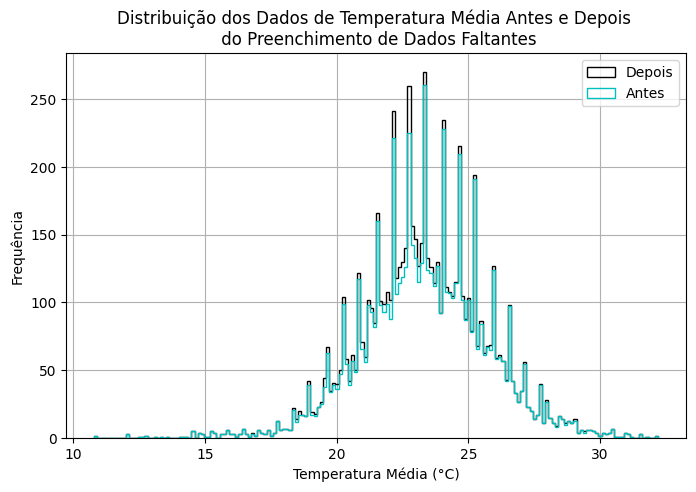

In [12]:
plt.figure(figsize = (8,5))

plt.hist(df_auto_inter['Temp. Med (°C)'],
         bins = len(df_auto['Temp. Med (°C)'].unique()),
         histtype = 'step',
         color = 'k',
         label = 'Depois')

plt.hist(df_auto['Temp. Med (°C)'],
         bins = len(df_auto['Temp. Med (°C)'].unique()),
         histtype  ='step',
         color = 'c',
         label = 'Antes')

plt.title('Distribuição dos Dados de Temperatura Média Antes e Depois \n do Preenchimento de Dados Faltantes')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Frequência')
plt.grid()
plt.legend()
plt.show()

É possível visualizar como a série temporal ficou após o preenchimento dos dados, nesse caso, também para a coluna da temperatura média.

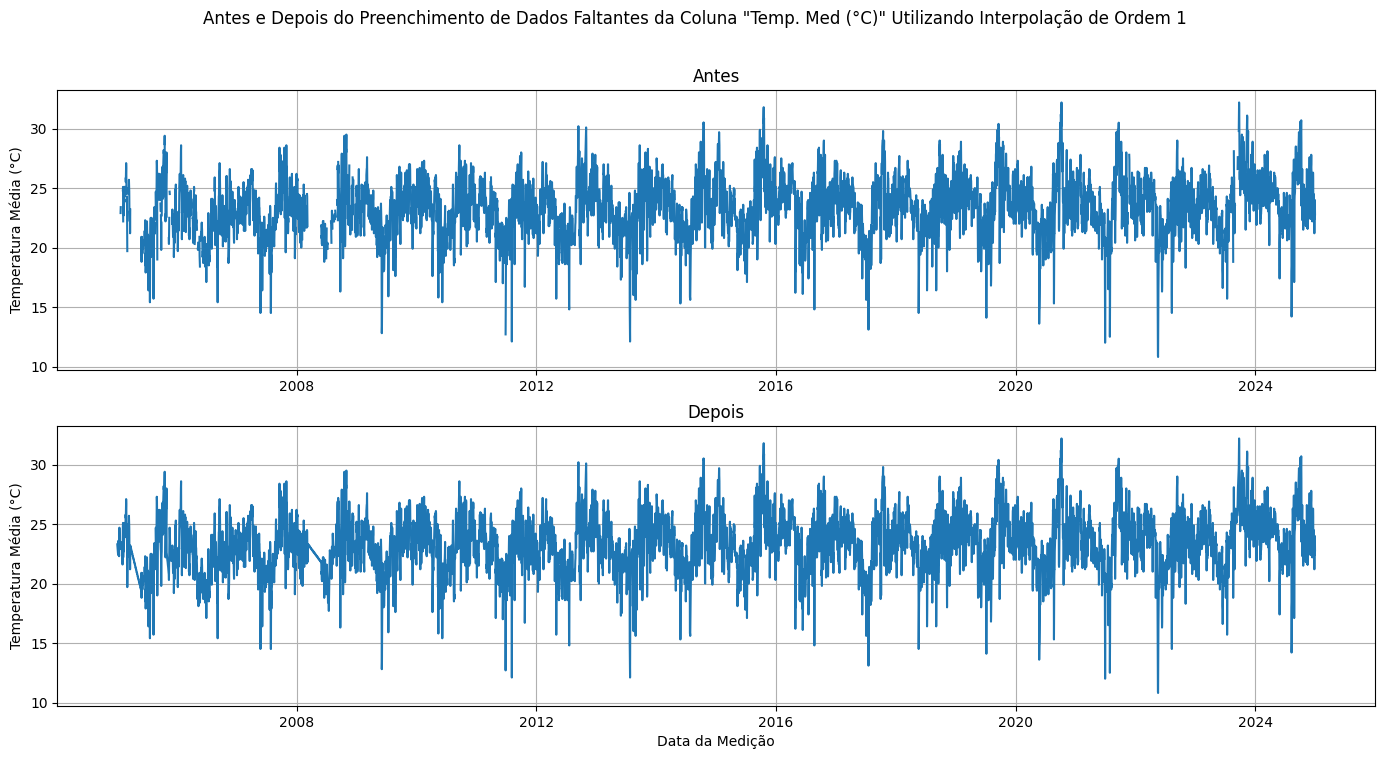

In [13]:
fig, ax = plt.subplots(2)
fig.suptitle('Antes e Depois do Preenchimento de Dados Faltantes da Coluna "Temp. Med (°C)" Utilizando Interpolação de Ordem 1')
fig.set_size_inches(17, 8)

ax[0].set_title('Antes')
ax[0].set_ylabel('Temperatura Média (°C)')
ax[0].plot(df_auto['Data da Medição'], df_auto['Temp. Med (°C)'])
ax[0].grid()

ax[1].set_title('Depois')
ax[1].plot(df_auto['Data da Medição'], df_auto_inter['Temp. Med (°C)'])
ax[1].set_ylabel('Temperatura Média (°C)')
ax[1].set_xlabel('Data da Medição')
ax[1].grid()

##### 2.3 - Dados da estação automática prontos para análise.


---

Por fim, foi adicionada a coluna 'amplitude de temperatura diária' ao nosso DataFrame, assim, teremos dados completos, tipados corretamente e prontos para análise.

In [14]:
df_auto_inter['Amplitude de Temp. diária (°C)'] = df_auto_inter['Temp. Max (°C)'] - df_auto_inter['Temp. Min (°C)']
df_auto_inter

,Data da Medição,Precipitação total (mm),Pressão atmosférica (mB),Temp. Max (°C),Temp. Med (°C),Temp. Min (°C),Umidade relativa do ar (%),"Vento, velocidade média (m/s)",Amplitude de Temp. diária (°C)
0,2005-01-01,5.6,916.0,29.6,23.3,18.9,73.1,1.4,10.7
1,2005-01-02,9.7,916.3,28.2,23.1,18.4,69.3,2.0,9.8
2,2005-01-03,13.8,916.6,26.8,22.9,17.8,81.4,2.6,9.0
3,2005-01-04,14.2,914.9,26.5,22.8,19.1,82.0,2.5,7.4
4,2005-01-05,14.6,915.2,27.1,22.6,19.6,78.4,2.2,7.5
...,...,...,...,...,...,...,...,...,...
7300,2024-12-27,20.6,915.8,23.8,21.2,19.6,88.1,1.6,4.2
7301,2024-12-28,8.6,916.1,27.9,22.6,20.5,81.7,1.4,7.4
7302,2024-12-29,6.4,914.6,25.9,22.4,20.3,83.1,1.4,5.6
7303,2024-12-30,0.8,914.2,30.4,24.0,20.7,72.8,2.0,9.7


In [15]:
df_auto_inter.head()

,Data da Medição,Precipitação total (mm),Pressão atmosférica (mB),Temp. Max (°C),Temp. Med (°C),Temp. Min (°C),Umidade relativa do ar (%),"Vento, velocidade média (m/s)",Amplitude de Temp. diária (°C)
0,2005-01-01,5.6,916.0,29.6,23.3,18.9,73.1,1.4,10.7
1,2005-01-02,9.7,916.3,28.2,23.1,18.4,69.3,2.0,9.8
2,2005-01-03,13.8,916.6,26.8,22.9,17.8,81.4,2.6,9.0
3,2005-01-04,14.2,914.9,26.5,22.8,19.1,82.0,2.5,7.4
4,2005-01-05,14.6,915.2,27.1,22.6,19.6,78.4,2.2,7.5


### 3. Análise Exploratória de Dados (EDA)


---



##### 3.1 - Correlação entre as variáveis
---

Será utilizado o método `.corr` no Dataframe, que calculará a correlação entre os pares de colunas. Utilizaremos a correlação padrão de Peason, que mede a relação linear entre duas variáveis

* Um valor próximo a `+1` indica uma correlação positiva forte: quando uma variável aumenta, a outra tende a aumentar também;
* Um valor próximo a `-1` indica uma correlação negativa forte: quando uma variável aumenta, a outra tende a diminuir;
* Um valor próxima a `0` indica que não há correlação linear entre as variáveis.

Do mapa de calor, podemos tirar algumas conclusões:

* Há **correlação positiva forte** entre as temperaturas máxima, média e mínima, o que pode ser explicado pelo fato de que, quando a temperatura máxima aumenta, a média e mínima tendem a aumentar também, porém, vemos uma menor influência nas temperaturas mínimas, o que pode indicar um aumento da amplitude das temperaturas;

* Há um **correlação positiva moderada** entre as variáveis de umidade do ar e precipitação, nos sugerindo que quando a umidade do ar aumenta, a possibilidade de precipitação também aumenta;

* Há uma **correlação negativa forte** entre a amplitude da temperatura e a umidade relativa do ar, indicando que, quando a amplitude da temperatura diária diminui, a umidade tende a aumentar;

* Parece existir uma **correlação negativa moderada** entre as variáveis de pressão atmosférica e temperaturas, isso quer dizer que, quando a pressão atmosférica aumenta, as temperaturas tendem a diminuir;

* Também parece existir **correlação negativa moderada** entre a pressão atmosférica, precipitação e umidade do ar, indicando que quando a pressão atmosférica diminui, a umidade a possibilidade de precipitação tendem a aumentar;

* Há **correlação negativa moderada** entre as variáveis umidade do ar e temperatura máxima, indicando que quando a temperatura aumenta, a umidade cai.

De forma geral, a pressão atmosférica tem um correlação linear negativa moderada com as outras variáveis, enquanto que a velocidade do vento não parece ter correlações fortes com nenhuma outra variável



<Axes: >

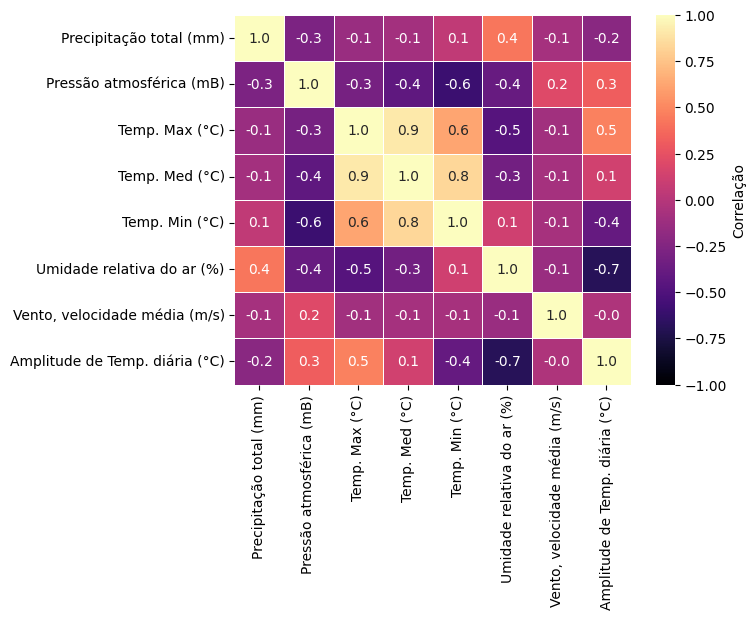

In [16]:
# Colunas selecionada para análise da matriz de correalação
numeric_cols_auto = ['Precipitação total (mm)',
                     'Pressão atmosférica (mB)',
                     'Temp. Max (°C)',
                     'Temp. Med (°C)',
                     'Temp. Min (°C)',
                     'Umidade relativa do ar (%)',
                     'Vento, velocidade média (m/s)',
                     'Amplitude de Temp. diária (°C)']

# Calculando a matriz de correlação
corr_matrix = df_auto_inter[numeric_cols_auto].corr(method = 'pearson')

# Criando uma máscara para mostrar apenas os elementos abaixo da diagonal
# mask = np.triu(np.ones_like(corr_matrix), k = 1)

sns.heatmap(corr_matrix,
            annot = True,
            cbar_kws = {'label': 'Correlação'},
            cmap = 'magma',
            fmt = '.1f',
            norm = Normalize(vmin = -1, vmax = 1),
            # mask = mask,
            linewidth = .5)

##### 3.2 - Amplitude Anual de temperatura ao longo dos anos
---
Aqui, temos como se comporta a amplitude entre as temperaturas máximas e mínimas ao longo dos anos.

Anteriormente, na análise da matriz de correlação, foi levantada e hipótese de que, a amplitude entre as temperaturas máximas e mínimas estava tendendo a aumentar por apresentarem uma correlação positiva moderada e não forte, como a temperatura média. Além disso, o gráfico abaixo consegue evidenciar que isso vem ocorrendo desde o ano de 2014, apresentando picos e vales bem pronunciados a partir de então, nos mostrando que a variabilidade da amplitude também está aumentando.

O aumento da amplitude anual expressa que os verões estão se tornando mais quentes e os invernos, mais frios.

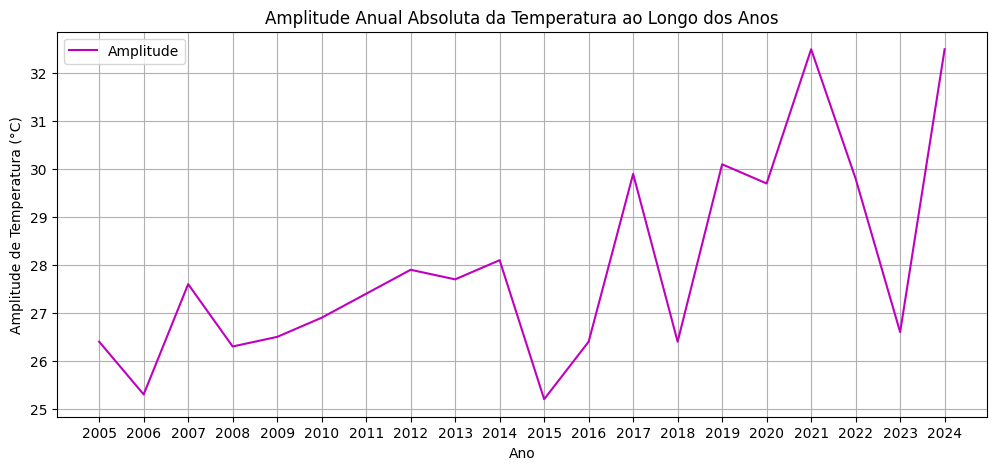

In [17]:
# Separando as colunas de interesse
cols = ['Data da Medição', 'Temp. Max (°C)', 'Temp. Min (°C)']

# Criando uma cópia do Dataframe
df_ampl_max_min = df_auto_inter[cols].copy()

# Agrupando pelo ano e agregando os valores máximos e mínimos
df_ampl_max_min = df_ampl_max_min.groupby(df_ampl_max_min['Data da Medição'].dt.year).agg(['min', 'max'])

# Calculando amplitudes anuais de temperatura
df_ampl_max_min['amplitudes de temperatura'] = df_ampl_max_min['Temp. Max (°C)']['max'] - df_ampl_max_min['Temp. Min (°C)']['min']

# Gráfico de amplitude anual de temperatura
fig, ax = plt.subplots()

fig.set_size_inches(12, 5)

ax.set_title('Amplitude Anual Absoluta da Temperatura ao Longo dos Anos')
ax.set_xlabel('Ano')
ax.set_ylabel('Amplitude de Temperatura (°C)')
ax.set_xticks(df_ampl_max_min.index)
ax.set_yticks(np.arange(25, 33, 1))

ax.plot(df_ampl_max_min.index,
        df_ampl_max_min['amplitudes de temperatura'],
        label = 'Amplitude',
        c = 'm',
        lw = 1.5)

ax.legend()
ax.grid()

##### 3.3 - Análise da temperatura média ao longo de um ano *vs* meses


---



O gráfico abaixo mostra qual o comportamento da temperatura média ao longo de um ano. Dele, podemos inferir que nossos dados aprensentam **sazonalidade**, ou seja, dependendo da época do ano, temos comportamentos específicos, nesse caso, causados pelas diferentes estações do ano. Por exemplo, a partir do mês de abril, a temperatura média começa a cair, comportamento que se mantém até o mês de julho, onde as temperaturas começam a subir e atingem seu máximo entre setembro e outubro.

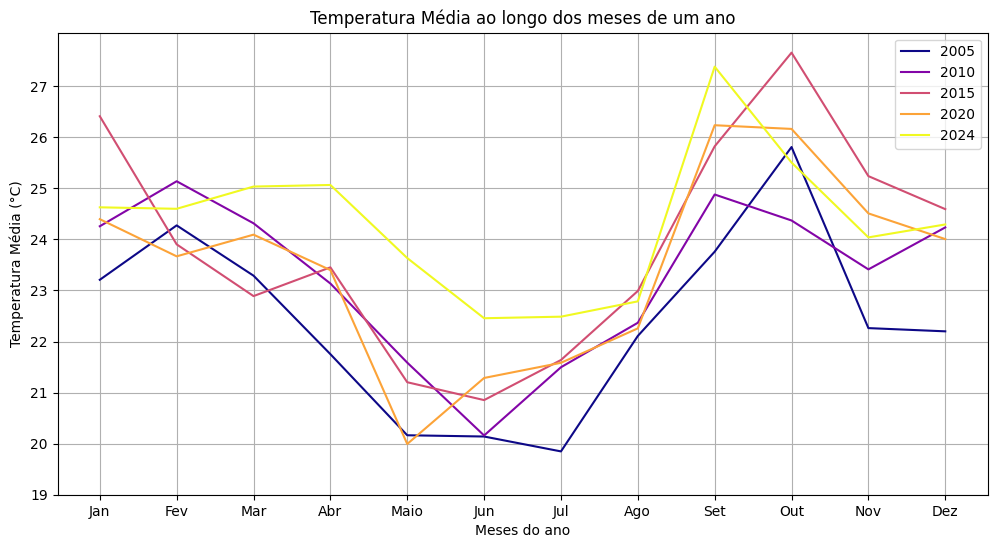

In [18]:
# Criando uma cópia do Dataframe, selecionando apenas colunas de interesse
df_temp_med = df_auto_inter[['Data da Medição', 'Temp. Med (°C)']].copy()

# Agrupar dados por meses

df_temp_med = df_temp_med.groupby([df_temp_med['Data da Medição'].dt.year, df_temp_med['Data da Medição'].dt.month])['Temp. Med (°C)'].mean()

df_temp_med.index.names = ['Ano', 'Mes']

# Gráfico da temperatura ao longo de um ano x meses

anos_selecionados = np.array([2005, 2010, 2015, 2020, 2024])
meses = np.arange(1, 13)

cmap = mpl.colormaps['plasma']
norm = mpl.colors.Normalize(vmin = anos_selecionados.min(), vmax = anos_selecionados.max())

plt.figure(figsize = (12,6))
for i, ano in enumerate(anos_selecionados):
  temp_med_ano = df_temp_med.loc[(ano, slice(None))]
  plt.plot(meses, temp_med_ano, label = ano, c = cmap(norm(ano)), lw = 1.5)

plt.title('Temperatura Média ao longo dos meses de um ano')
plt.xlabel('Meses do ano')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(meses, ('Jan', 'Fev', 'Mar', 'Abr', 'Maio', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'))
plt.yticks(np.arange(19, 28, 1))
plt.legend()
plt.grid()

##### 3.4 - Gráfico da Temperatura média ao longo dos anos


---



Outra análise que pode ser feita é da temperatura média ao longo dos anos na cidade.

Segundo análises feitas pela NASA, os últimos 10 anos, foram os anos mais quentes da história, sendo o ano de 2024 o mais quente já registrado ([Global Temperature](https://climate.nasa.gov/vital-signs/global-temperature/?intent=121)). O gráfico feito pela agência americana mostra a mudança de temperatura em relação a média de temperatura calculada entre os anos de 1951 a 1980, então ele nos diz em quanto aumentou ou diminuiu a temperatura média na superfície da Terra levando em consideração esse valor de referência. A partr disso, fiz o gráfico da temperatura média ao longo dos anos para a cidade de Uberlândia e, assim como no gráfico apresentado pela NASA, vemos uma tendência crescente da temperatura média anual. Além disso, podemos perceber também que eles apresentam picos e vales em datas semelhantes.


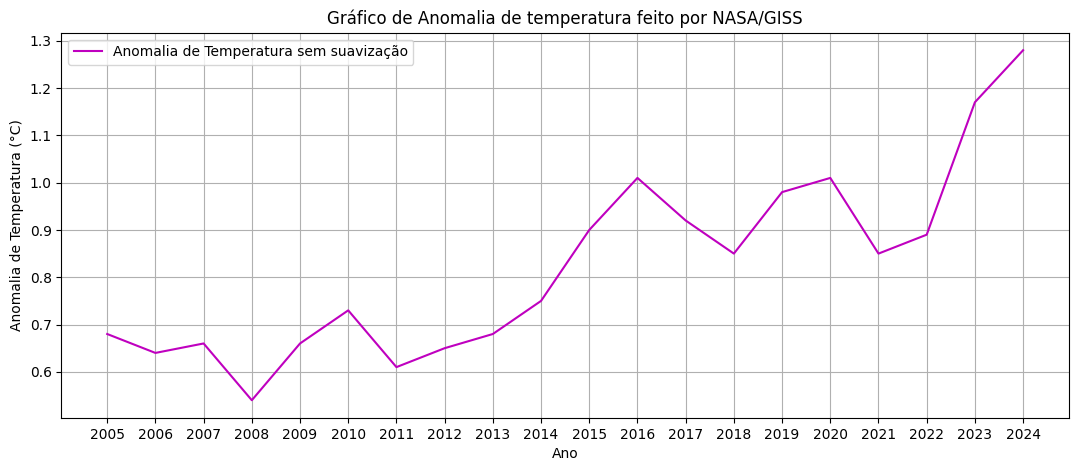

In [19]:
# Carregando dados da NASA
df_n = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/dados-atividade-extensionista/NASA_mean_temperature/NASA_data_mean_temperatures.txt',
                   skiprows = 5,
                   names = ['Year', 'No_Smoothing', 'Lowess(5)'],
                   sep = '\s+')

# Alterando tipos de dados
df_n = df_n.astype({'No_Smoothing': 'float64'})

# Selecionando dados de interesse
df_nasa = df_n.loc[df_n['Year'] >= 2005]

# Plotando gráfico da anomalia de temperaturas
fig, ax = plt.subplots()

fig.set_size_inches(13, 5)

ax.set_title('Gráfico de Anomalia de temperatura feito por NASA/GISS')
ax.set_xlabel('Ano')
ax.set_ylabel('Anomalia de Temperatura (°C)')
ax.set_xticks(df_nasa['Year'])
ax.grid()

ax.plot(df_nasa['Year'],
        df_nasa['No_Smoothing'],
        label = 'Anomalia de Temperatura sem suavização',
        c = 'm',
        lw = 1.5)
ax.legend()

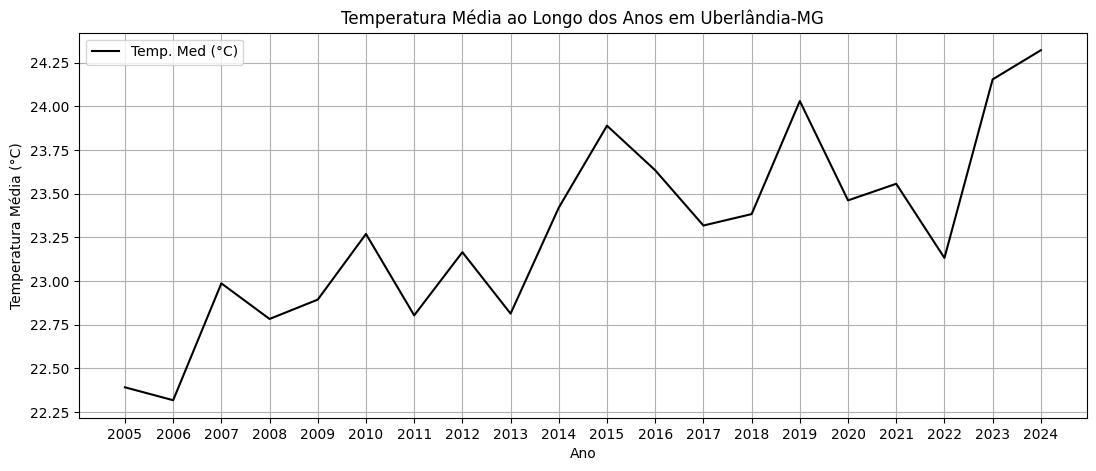

In [20]:
# Separando as colunas de interesse
cols = ['Data da Medição', 'Temp. Med (°C)']
n_cols = ['Temp. Med (°C)']

# Criando uma cópia do Dataframe
df_temp_med = df_auto_inter[cols].copy()

# Agrupando pelo ano e agregando os valores máximos e mínimos
df_temp_med = df_temp_med.groupby(df_temp_med['Data da Medição'].dt.year).agg(['mean'])

# Gráfico da tendência da temperatura média ao longo dos anos

fig, ax = plt.subplots()

fig.set_size_inches(13, 5)

ax.set_title('Temperatura Média ao Longo dos Anos em Uberlândia-MG')
ax.set_xlabel('Ano')
ax.set_ylabel('Temperatura Média (°C)')
ax.set_xticks(df_temp_med.index)
# ax.set_yticks(np.arange(22, 25, 0.5))
ax.grid()

ax.plot(df_temp_med.index,
        df_temp_med['Temp. Med (°C)']['mean'],
        label = 'Temp. Med (°C)',
        c = 'k',
        lw = 1.5)
ax.legend()

##### 3.5 - Gráficos das temperaturas máxima e mínima ao longo dos anos
---
Assim como a temperatura média, tanto a média das temperaturas máximas e mínimas também mostram uma tendência de crescimento.


Média das temperaturas máximas ao longo dos anos

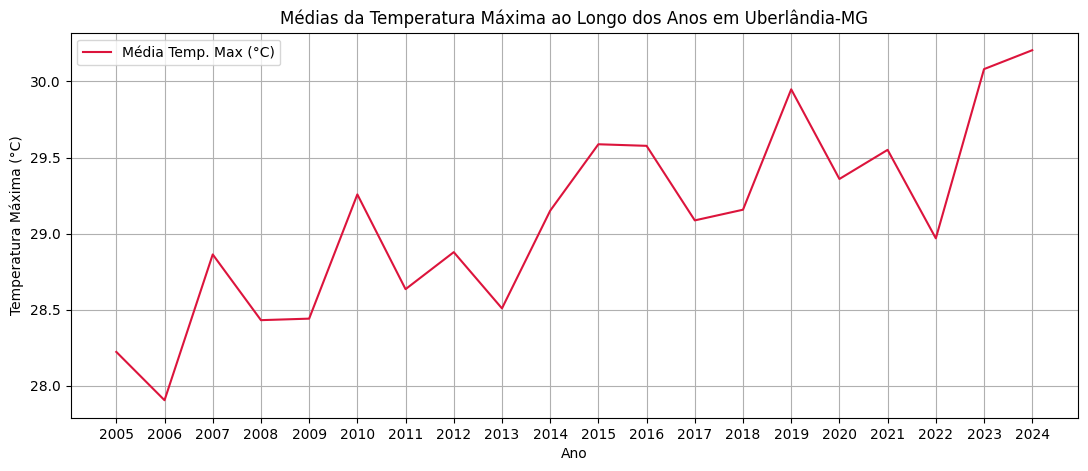

In [21]:
# Separando as colunas de interesse
cols = ['Data da Medição', 'Temp. Max (°C)']
n_cols = ['Temp. Max (°C)']

# Criando uma cópia do Dataframe
df_temp_max = df_auto_inter[cols].copy()

# Agrupando pelo ano e agregando os valores máximos e mínimos
df_temp_max = df_temp_max.groupby(df_temp_max['Data da Medição'].dt.year).agg(['mean'])

# Gráfico da tendência da temperatura média ao longo dos anos

fig, ax = plt.subplots()

fig.set_size_inches(13, 5)

ax.set_title('Médias da Temperatura Máxima ao Longo dos Anos em Uberlândia-MG')
ax.set_xlabel('Ano')
ax.set_ylabel('Temperatura Máxima (°C)')
ax.set_xticks(df_temp_max.index)
ax.grid()

ax.plot(df_temp_max.index,
        df_temp_max['Temp. Max (°C)']['mean'],
        label = 'Média Temp. Max (°C)',
        c = 'crimson',
        lw = 1.5)
ax.legend()

Média das temperaturas mínimas ao longo dos anos

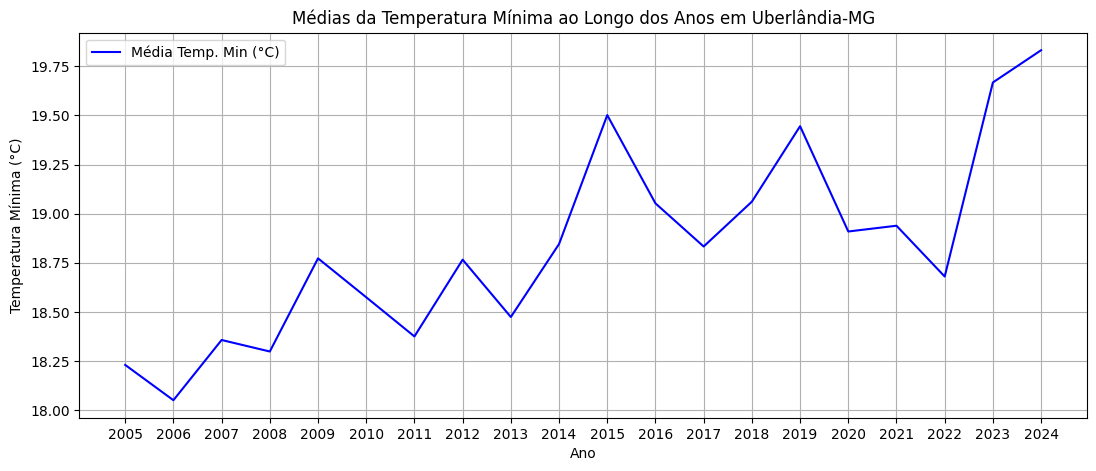

In [22]:
# Separando as colunas de interesse
cols = ['Data da Medição', 'Temp. Min (°C)']
n_cols = ['Temp. Min (°C)']

# Criando uma cópia do Dataframe
df_temp_min = df_auto_inter[cols].copy()

# Agrupando pelo ano e agregando os valores máximos e mínimos
df_temp_min = df_temp_min.groupby(df_temp_min['Data da Medição'].dt.year).agg(['mean'])

# Gráfico da tendência da temperatura média ao longo dos anos

fig, ax = plt.subplots()

fig.set_size_inches(13, 5)

ax.set_title('Médias da Temperatura Mínima ao Longo dos Anos em Uberlândia-MG')
ax.set_xlabel('Ano')
ax.set_ylabel('Temperatura Mínima (°C)')
ax.set_xticks(df_temp_min.index)
ax.grid()

ax.plot(df_temp_min.index,
        df_temp_min['Temp. Min (°C)']['mean'],
        label = 'Média Temp. Min (°C)',
        c = 'b',
        lw = 1.5)
ax.legend()

##### 3.6 - Gráfico da Precipitação
---
Ao analisar o gráfico de precipitação acumulada ao longo dos anos, é possível perceber que o volume de chuva não apresenta uma tendência clara de crescimento ou decrescimento.

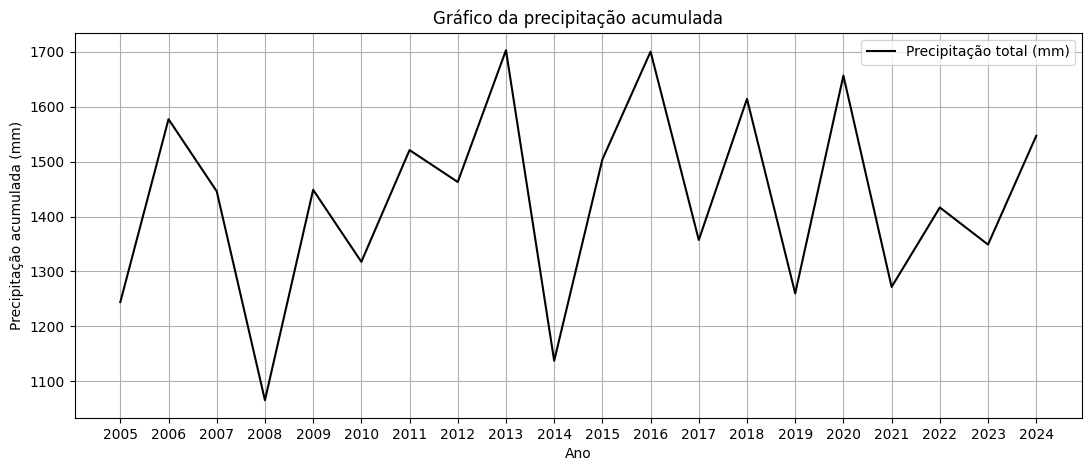

In [23]:
# Selecionando colunas de interesse
colunas = ['Data da Medição', 'Precipitação total (mm)']

# Preparando o dataframe com as colunas selecionadas
df_precipitacao = df_auto_inter[colunas].copy()

df_precipitacao = df_precipitacao.groupby(df_precipitacao['Data da Medição'].dt.year)['Precipitação total (mm)'].agg(['sum']).reset_index()

df_precipitacao = df_precipitacao.rename(columns = {'sum': 'Precipitação total (mm)'})

fig, ax = plt.subplots()

fig.set_size_inches(13, 5)

ax.set_title('Gráfico da precipitação acumulada')
ax.set_xlabel('Ano')
ax.set_ylabel('Precipitação acumulada (mm)')
ax.set_xticks(df_precipitacao['Data da Medição'])
ax.set_yticks(np.arange(1000, 1800, 100))
ax.grid()
ax.plot(df_precipitacao['Data da Medição'], df_precipitacao['Precipitação total (mm)'], label = 'Precipitação total (mm)', c = 'k', lw = 1.5)
ax.legend()

Por outro lado, quando analisamos o gráfico da precipitação ao longo dos meses, vemos que temos um padrão de comportamento, com poucas chuvas entre Meio e Setembro.

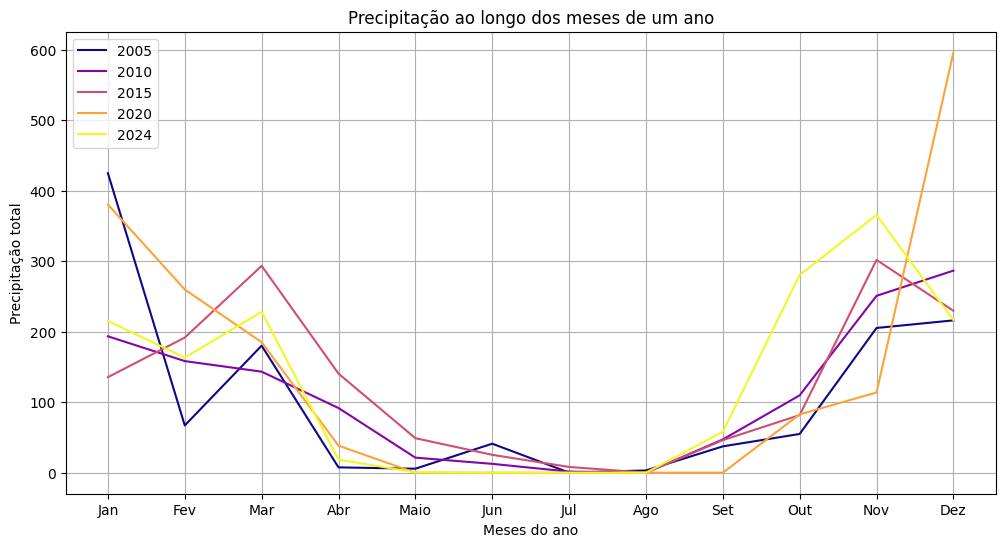

In [24]:
# Criando uma cópia do Dataframe, selecionando apenas colunas de interesse
df_prec_mes = df_auto_inter[['Data da Medição', 'Precipitação total (mm)']].copy()

# Agrupar dados por meses

df_prec_mes = df_prec_mes.groupby([df_prec_mes['Data da Medição'].dt.year, df_prec_mes['Data da Medição'].dt.month])['Precipitação total (mm)'].sum()

df_prec_mes.index.names = ['Ano', 'Mes']

# Gráfico da temperatura ao longo de um ano x meses

anos_selecionados = np.array([2005, 2010, 2015, 2020, 2024])
meses = np.arange(1, 13)

cmap = mpl.colormaps['plasma']
norm = mpl.colors.Normalize(vmin = anos_selecionados.min(), vmax = anos_selecionados.max())

plt.figure(figsize = (12,6))
for i, ano in enumerate(anos_selecionados):
  temp_med_ano = df_prec_mes.loc[(ano, slice(None))]
  plt.plot(meses, temp_med_ano, label = ano, c = cmap(norm(ano)), lw = 1.5)

plt.title('Precipitação ao longo dos meses de um ano')
plt.xlabel('Meses do ano')
plt.ylabel('Precipitação total')
plt.xticks(meses, ('Jan', 'Fev', 'Mar', 'Abr', 'Maio', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'))
# plt.yticks(np.arange(19, 28, 1))
plt.legend()
plt.grid()

### 4. Análise e previsão
---
Nesta etapa, nosso objetivo é implementar um modelo de previsão de temperaturas máximas para a cidade. Para isso, vamos usar a biblioteca desenvolvida pelo Facebook para previsão de séries temporais, ``Prophet``. Ela é adequada para séries temporais que apresentam forte sazonalidade e tendências de longo prazo, características que foram vistas em nossos dados nas etapas anteriores.

A biblioteca requer que nossos dados estejam em um fomato específico, com pelo menos duas colunas: uma denominada ``ds``, onde as datas serão armazenadas e a outra, ``y``, onde estarão os dados da variável que queremos prever, neste caso, a temperatura máxima. As colunas opicionais que podem ser adicionadas ao modelo são os chamados ``regressores``, que são variáveis que levaremos em conta ao prever a temperatura máxima. Para fins comparativos, treinaremos o modelo com e sem regressores, que serão a pressão atmosférica e a umidade relativa do ar, que além de serem fatores que, de fato, influenciam na temperatura, mostraram correleções moderadas com essa variável, como visto anteriormente.

#### 4.1 - Modelo sem Regressores
----

Antes de partimos para o modelo, o conjunto de dados será dividido em ``dados de treino`` e ``dados de teste``, convencionalmente na proporção de 80% para o treino e 20% para os testes. Para isso, utilizaremos o método ``train_test_split`` presente na biblioteca ``sklearn``, lembrando que, se tratando de uma série temporal, os dados precisam manter sua ordem cronológica, por isso, ``shuffle = False``.

Ao aplicar o modelo, podemos ainda escolher o intervalo de confiança desejado em nossa análise, o valor escolhido para o intervalo de confiança foi de 90%.

In [25]:
# Selecionando as colunas
col_selecionadas = ['Data da Medição', 'Temp. Max (°C)']

# Criando um novo Dataframe
df = df_auto_inter[col_selecionadas]

# Fazendo a coluna data ser o índice dos nossos dados
df.set_index(df_auto_inter['Data da Medição'])

# Renomeando as colunas
df = df.rename(columns={'Data da Medição': 'ds', 'Temp. Max (°C)': 'y'})

# Dividindo dados em treino e teste
treino, teste = train_test_split(df,
                                 test_size = 0.2,
                                 shuffle = False)

# Instanciando o modelo
modelo = Prophet(daily_seasonality = False,
                 weekly_seasonality = False,
                 interval_width = 0.9)

# Treinando o modelo
modelo.fit(treino)

# Fazendo previsões
previsao = modelo.predict(teste)

# Apresentando a tabela da previsão do modelo, apresentando a incerteza
# associada
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmeoifcdk/nsd7jig4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmeoifcdk/zusx643_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8321', 'data', 'file=/tmp/tmpmeoifcdk/nsd7jig4.json', 'init=/tmp/tmpmeoifcdk/zusx643_.json', 'output', 'file=/tmp/tmpmeoifcdk/prophet_modelyv4pf_90/prophet_model-20250214172814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01,30.022697,26.231082,33.512822
1,2021-01-02,30.013993,26.159800,33.760644
2,2021-01-03,30.001352,26.504038,33.774441
3,2021-01-04,29.985312,26.484709,33.721636
4,2021-01-05,29.966526,26.019721,33.630897
...,...,...,...,...
1456,2024-12-27,30.345693,26.558854,34.069833
1457,2024-12-28,30.359772,26.712261,33.987248
1458,2024-12-29,30.369384,26.457479,34.349155
1459,2024-12-30,30.374332,26.498363,34.206509


##### 4.1.1 - Visualizando o Modelo
---

Aqui, criamos um gráfico da previsão feita pelo modelo com o seu intervalo de incerteza, junto dos dados reais observados. Nele, o intervalo de incerteza se mostra bem pronunciado, o que pode ser explicado pela grande variabidade da variável temperatura máxima, mostrada em azul.

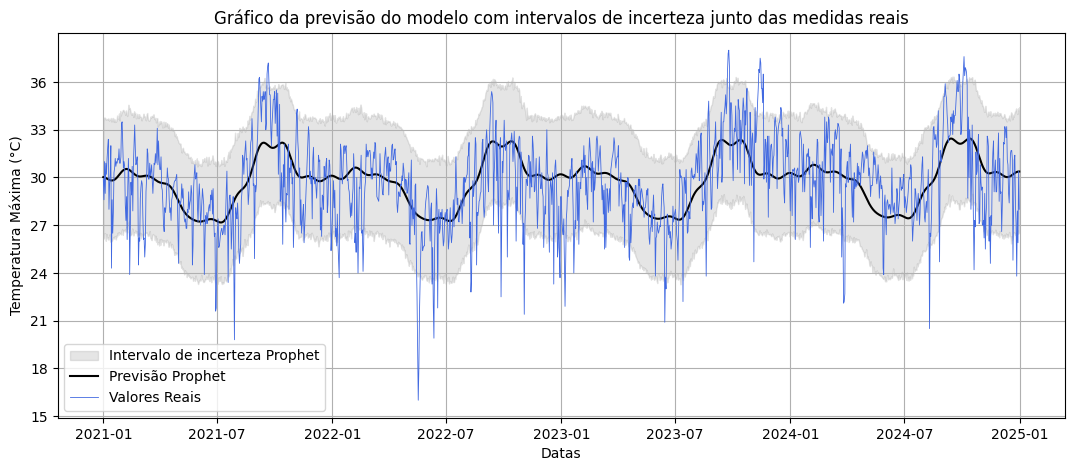

In [26]:
fig, ax = plt.subplots()

fig.set_size_inches(13, 5)

ax.set_title('Gráfico da previsão do modelo com intervalos de incerteza junto das medidas reais')
ax.set_xlabel('Datas')
ax.set_ylabel('Temperatura Máxima (°C)')
ax.set_yticks(np.arange(15, 39, 3))

ax.fill_between(previsao['ds'],
                previsao['yhat_lower'],
                previsao['yhat_upper'],
                color='grey',
                alpha=0.2,
                label='Intervalo de incerteza Prophet')

ax.plot(previsao['ds'],
        previsao['yhat'],
        label = 'Previsão Prophet',
        c = 'k',
        lw = 1.5)

ax.plot(teste['ds'],
        teste['y'],
        label = 'Valores Reais',
        c = 'royalblue',
        lw = 0.6)

ax.legend()
ax.grid()
fig.show()

Outra visualização que pode ser importante para análise é o gráfico de componentes que compõem a previsão da série temporal, nesse caso, a tendência (trend) e a sazonalidade anual (yearly).

O gráfico de tendência apresenta para qual direção nossos dados estão indo, nesse caso, a temperatura máxima na cidade está tendendo a aumentar com o passar dos anos. A sombra azul presente mais visivelmente após Julho/2021 indica a incerteza das previsões, que aumenta com o horizonte de previsão.

E o gráfico da sazonalidade nos mostra que existe um padrão que se repete ao longo dos anos para a temperatura máxima, que se dá pelas diferentes estações do ano.

In [27]:
fig2 = plot_components_plotly(modelo, previsao)
fig2.update_layout(height = 600, width = 1000)
fig2.show()

#### 4.2 - Modelo com Regressores
---
O procedimento será similiar ao feito para o modelo sem regressores, o conjunto de dados será divido em treino e teste na proporção 80/20, sem embaralhamento dos dados e nível de confiança em 90%. A diferença é a adição das colunas que serão os regressores (pressão atmosférica e umidade relativa do ar) no treinamento do modelo.

In [28]:
# Selecionando as colunas
col_selecionadas = ['Data da Medição',
                    'Temp. Max (°C)',
                    'Pressão atmosférica (mB)',
                    'Umidade relativa do ar (%)']

# Criando um novo Dataframe
df = df_auto_inter[col_selecionadas]

# Fazendo a coluna data ser o índice dos nossos dados
df.set_index(df_auto_inter['Data da Medição'])

# Renomeando as colunas
df = df.rename(columns={'Data da Medição': 'ds',
                        'Temp. Max (°C)': 'y',
                        'Pressão atmosférica (mB)': 'reg',
                        'Umidade relativa do ar (%)': 'reg2'})

# Dividindo dados em treino e teste
treino, teste_reg = train_test_split(df,
                                     test_size = 0.2,
                                     shuffle = False)

# Instanciando o modelo
modelo_reg = Prophet(daily_seasonality = False,
                     weekly_seasonality = False,
                     interval_width = 0.9)

# adicionando regressores
modelo_reg.add_regressor('reg')
modelo_reg.add_regressor('reg2')

# Treinando o modelo_reg
modelo_reg.fit(treino)

# Fazendo previsões
previsao_reg = modelo_reg.predict(teste_reg)

previsao_reg[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmeoifcdk/mcu52epi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmeoifcdk/91pyw7h7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79017', 'data', 'file=/tmp/tmpmeoifcdk/mcu52epi.json', 'init=/tmp/tmpmeoifcdk/91pyw7h7.json', 'output', 'file=/tmp/tmpmeoifcdk/prophet_model4o7edeh0/prophet_model-20250214172817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01,29.110507,26.555150,31.609083
1,2021-01-02,28.647129,25.963660,31.147149
2,2021-01-03,29.909074,27.281468,32.431571
3,2021-01-04,30.000937,27.564845,32.458553
4,2021-01-05,30.855654,28.249341,33.533904
...,...,...,...,...
1456,2024-12-27,27.448434,24.215748,30.609833
1457,2024-12-28,28.257348,25.109301,31.660076
1458,2024-12-29,28.418612,25.360685,31.681798
1459,2024-12-30,29.927659,26.746295,33.066743


##### 4.2.1 - Visualizando o Modelo
---

Aqui, criamos um gráfico da previsão feita pelo modelo com o seu intervalo de incerteza, junto dos dados reais observados. Nele já percebemos a diferença de ajuste do modelo e do intervalo de incerteza, que é menor e, podemos concluir que o ajuste com os regressores se saiu bem melhor do que sem eles.


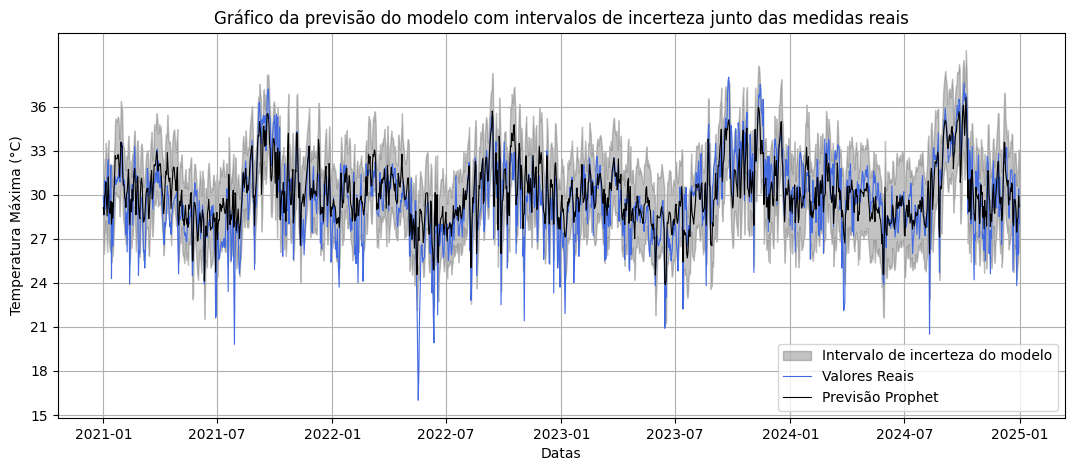

In [29]:
fig_reg, ax = plt.subplots()

fig_reg.set_size_inches(13, 5)

ax.set_title('Gráfico da previsão do modelo com intervalos de incerteza junto das medidas reais')
ax.set_xlabel('Datas')
ax.set_ylabel('Temperatura Máxima (°C)')
ax.set_yticks(np.arange(15, 39, 3))

ax.fill_between(previsao_reg['ds'],
                 previsao_reg['yhat_lower'],
                 previsao_reg['yhat_upper'],
                 color='dimgray',
                 alpha=0.4,
                 label='Intervalo de incerteza do modelo')

ax.plot(teste_reg['ds'],
        teste_reg['y'],
        label = 'Valores Reais',
        c = 'royalblue',
        lw = 0.8)

ax.plot(previsao_reg['ds'],
        previsao_reg['yhat'],
        label = 'Previsão Prophet',
        c = 'black',
        lw = 0.8)

ax.legend()
ax.grid()
fig_reg.show()

Como a variabilidade dos dados da previsão é maior, tanto o gráfico de tendência (trend) quanto o de sazonalidade anual (yearly) foram suavizados comparados aos mesmos gráficos sem os regressores. A tendência apresenta um crescimento mais discreto com maior incerteza e a sazonalidade se mostra mais forte nos períodos mais frios.

In [30]:
fig2_reg = plot_components_plotly(modelo_reg, previsao_reg)
fig2_reg.update_layout(height = 600, width = 1000)
fig2_reg.show()

### 5 - Avaliando os modelos
---
Como última etapa, vamos avaliar ambos os modelos criados. As métricas utilizadas serão o MAPE, *mean absolute percentage error* ou simplesmente erro da porcentagem média absoluta, que nos diz, em média, qual a porcentagem o modelo errou a previsão e, o RMSE, *root mean squared error* ou apenas raíz do erro médio ao quadrado, que quantifica a diferença entre as temperaturas previstas e as observadas.

#### 5.1 - Modelo sem Regressor
---
Para o modelo sem utilização dos regressores, temos

In [31]:
mape = mean_absolute_percentage_error(teste['y'], previsao['yhat'])
rmse = root_mean_squared_error(teste['y'], previsao['yhat'])

print(f'Erro da porcentagem média absoluta: {mape*100:.2f}%.',
      f'\nRaíz do erro médio ao quadrado: {rmse:.2f}°C.')

Erro da porcentagem média absoluta: 6.19%. 
Raíz do erro médio ao quadrado: 2.35°C.


#### 5.2 - Modelo com Regressores
----
Aqui, vamos avaliar o modelo de previsão com os regressores de pressão atmosférica e umidade relativa do ar.

In [32]:
mape_reg = mean_absolute_percentage_error(teste_reg['y'], previsao_reg['yhat'])
rmse_reg = root_mean_squared_error(teste_reg['y'], previsao_reg['yhat'])

print(f'Erro da porcentagem média absoluta: {mape_reg*100:.2f}%.',
      f'\nRaíz do erro médio ao quadrado: {rmse_reg:.2f}°C.')

Erro da porcentagem média absoluta: 4.63%. 
Raíz do erro médio ao quadrado: 1.71°C.


Comparando as métricas, percebe-se uma diminuição, tanto do MAPE quanto do RMSE, que nos indicam uma melhora no ajuste dos dados na utilização de regressores.